# Project Group 24  

## Final report: Movie genre classification

_James Fallon_  
_Tyler Finkelstein_  
_Aaron Myran_  
_Ihsaan Patel_  

## Introduction  

This report details our approach to the CS109B final project: movie genre classification. The aim of the project was to apply a variety of predictive techniques to the vast amount of publicly-available data on films. We leveraged two main sources of data: TMDb (The Movie Database) and IMDb (The Internet Movie Database). The aim of the project was to build toward applying deep learning techniques focused on image recognition to movie posters from TMDb, while also leveraging associated metadata from both databases (actors, ratings, budget, etc.).  

The project took place in 4 stages or milestones:  

1. Data collection and exploratory data analysis  
2. Determining methodology for structuring training data (both posters and metadata)  
3. Using traditional classification models to predict genres
4. Using deep learning techniques to predict genres  

## Data collection and exploratory data analysis  

We began by writing code to interface with the TMDb and IMDb application program interfaces (APIs), downloading detailed information, reviews and statistics for over 20,000 movies on the TMDb platform. We augmented this data by aligning the films with their IMDb identification code, and pulling down more details on the movies from that platform. We also downloaded approximately 13,000 movie posters from TMDb, keeping these separate for the early stages of the project.

### Exploratory data analysis  

We began by exploring the metadata. In particular, we were interested in analyzing how movies were categorized by genre and how those genres overlapped. We also sought to begin to get a sense for what features or variables might be correlated with certain genres, and how those variables differed across genres.  

Likewise, we were attuned to the potential challenges of combining data from both TMDb and IMDb. In particular, the sites' respective categorizations for genre did not align neatly. More broadly, we sought to use the EDA stage of the project to inform our strategy for dealing with a very complex response variable - genre - with multiple categories and extensive overlap beteween those categories.

In [22]:
%%HTML
<div class='tableauPlaceholder' id='viz1491392940635' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;cs&#47;cs109b_genre_proportion&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='cs109b_genre_proportion&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;cs&#47;cs109b_genre_proportion&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1491392940635');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='869px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [3]:
%%HTML
<div class='tableauPlaceholder' id='viz1491394078709' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;cs&#47;cs109b_genre_raw_total&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='cs109b_genre_raw_total&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;cs&#47;cs109b_genre_raw_total&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1491394078709');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1004px';vizElement.style.height='869px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


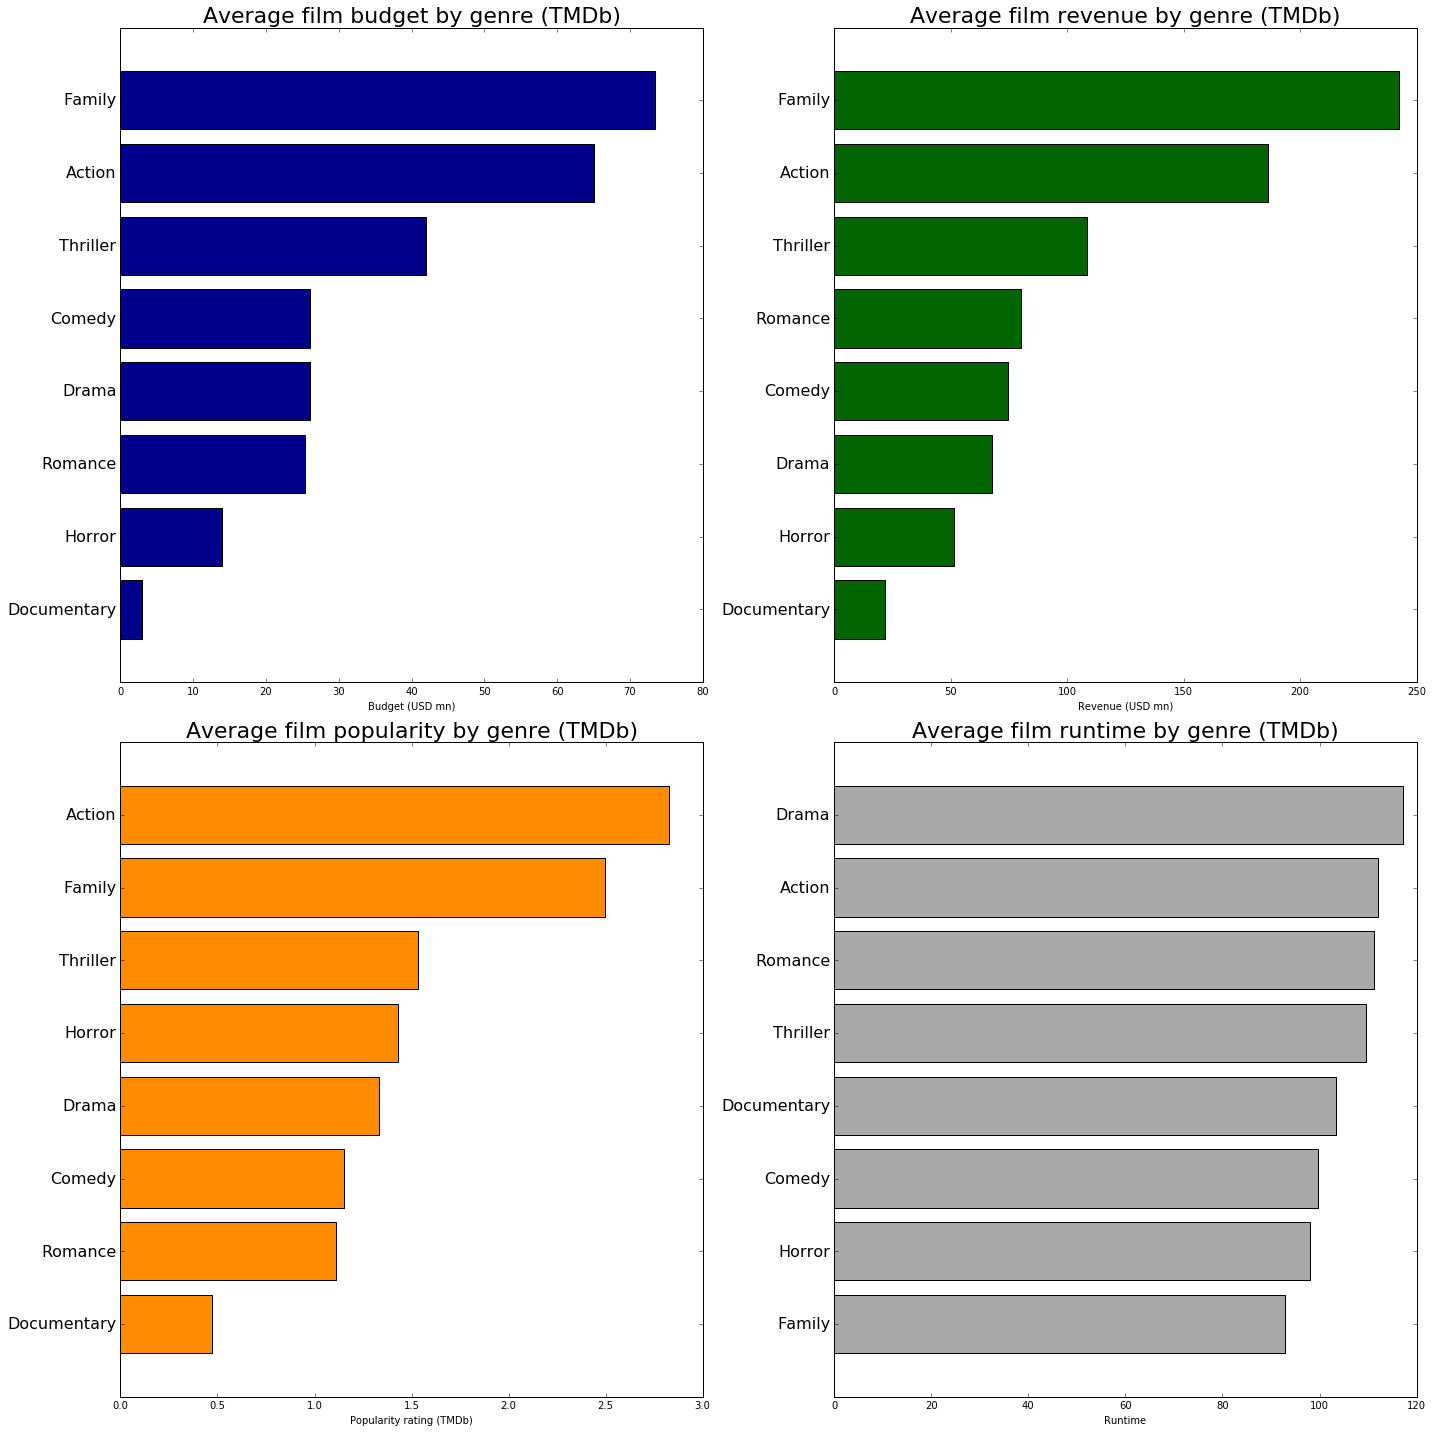

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Plot various differentiating characteristics of genres
train = pd.read_csv("/Users/James/Documents/Spring 2017/Data Science/Final project/Milestone_4/ihsaan_files/train_w_poster_updated_genres.csv")
test = pd.read_csv("/Users/James/Documents/Spring 2017/Data Science/Final project/Milestone_4/ihsaan_files/train_w_poster_updated_genres.csv")

# Create a dataframe for calculations and plotting
tmdb_plot = train.loc[:,['genre','revenue','popularity', 'budget', 'runtime']]

# Drop no budget/no revenue films
tmdb_plot = tmdb_plot[(tmdb_plot.revenue != 0) & (tmdb_plot.budget != 0)]

# Create an empty dataframe to store information about average revenue, popularity and budget
genre_plot = pd.DataFrame(index = list(set(train['genre'])), 
                          columns = ['Median Budget', 'Median Revenue','Median Popularity', 'Median Runtime',
                                     'Average Budget', 'Average Revenue','Average Popularity', 'Average Runtime'])

# Take the median of each statistic by genre 
for genre in list(set(train['genre'])):
    genre_plot.loc[genre, 'Median Budget'] = np.median(tmdb_plot.loc[tmdb_plot['genre']==genre, 'budget'])
    genre_plot.loc[genre, 'Median Revenue'] = np.median(tmdb_plot.loc[tmdb_plot['genre']==genre, 'revenue'])
    genre_plot.loc[genre, 'Median Popularity'] = np.median(tmdb_plot.loc[tmdb_plot['genre']==genre, 'popularity'])
    genre_plot.loc[genre, 'Average Budget'] = np.mean(tmdb_plot.loc[tmdb_plot['genre']==genre, 'budget'])
    genre_plot.loc[genre, 'Average Revenue'] = np.mean(tmdb_plot.loc[tmdb_plot['genre']==genre, 'revenue'])
    genre_plot.loc[genre, 'Average Popularity'] = np.mean(tmdb_plot.loc[tmdb_plot['genre']==genre, 'popularity'])
    genre_plot.loc[genre, 'Median Runtime'] = np.mean(tmdb_plot.loc[tmdb_plot['genre']==genre, 'runtime'])
    genre_plot.loc[genre, 'Average Runtime'] = np.mean(tmdb_plot.loc[tmdb_plot['genre']==genre, 'runtime'])
    
    
# Plot film characteristics by genre

fig, ax = plt.subplots(2, 2, figsize = (20, 20))

y_pos = np.arange(len(genre_plot.index))

ax[0,0].barh(y_pos, genre_plot['Average Budget'].sort_values()/1e6,  align = "center", color = "darkblue")
ax[0,0].set_yticks(y_pos)
ax[0,0].set_yticklabels(genre_plot.sort_values('Average Budget').index, fontsize = 16)
ax[0,0].set_ylim(-1, len(genre_plot.index))
ax[0,0].set_title("Average film budget by genre (TMDb)", fontsize = 22)
ax[0,0].set_xlabel("Budget (USD mn)")

ax[0,1].barh(y_pos, genre_plot['Average Revenue'].sort_values()/1e6, align = "center", color = "darkgreen")
ax[0,1].set_yticks(y_pos)
ax[0,1].set_yticklabels(genre_plot.sort_values('Average Revenue').index, fontsize = 16)
ax[0,1].set_ylim(-1, len(genre_plot.index))
ax[0,1].set_title("Average film revenue by genre (TMDb)", fontsize = 22)
ax[0,1].set_xlabel("Revenue (USD mn)")

ax[1,0].barh(y_pos, genre_plot['Average Popularity'].sort_values(), align = "center", color = "darkorange")
ax[1,0].set_yticks(y_pos)
ax[1,0].set_yticklabels(genre_plot.sort_values('Average Popularity').index, fontsize = 16)
ax[1,0].set_ylim(-1, len(genre_plot.index))
ax[1,0].set_title("Average film popularity by genre (TMDb)", fontsize = 22)
ax[1,0].set_xlabel("Popularity rating (TMDb)")

ax[1,1].barh(y_pos, genre_plot['Average Runtime'].sort_values(), align = "center", color = "darkgrey")
ax[1,1].set_yticks(y_pos)
ax[1,1].set_yticklabels(genre_plot.sort_values('Average Runtime').index, fontsize = 16)
ax[1,1].set_ylim(-1, len(genre_plot.index))
ax[1,1].set_title("Average film runtime by genre (TMDb)", fontsize = 22)
ax[1,1].set_xlabel("Runtime")

plt.tight_layout();

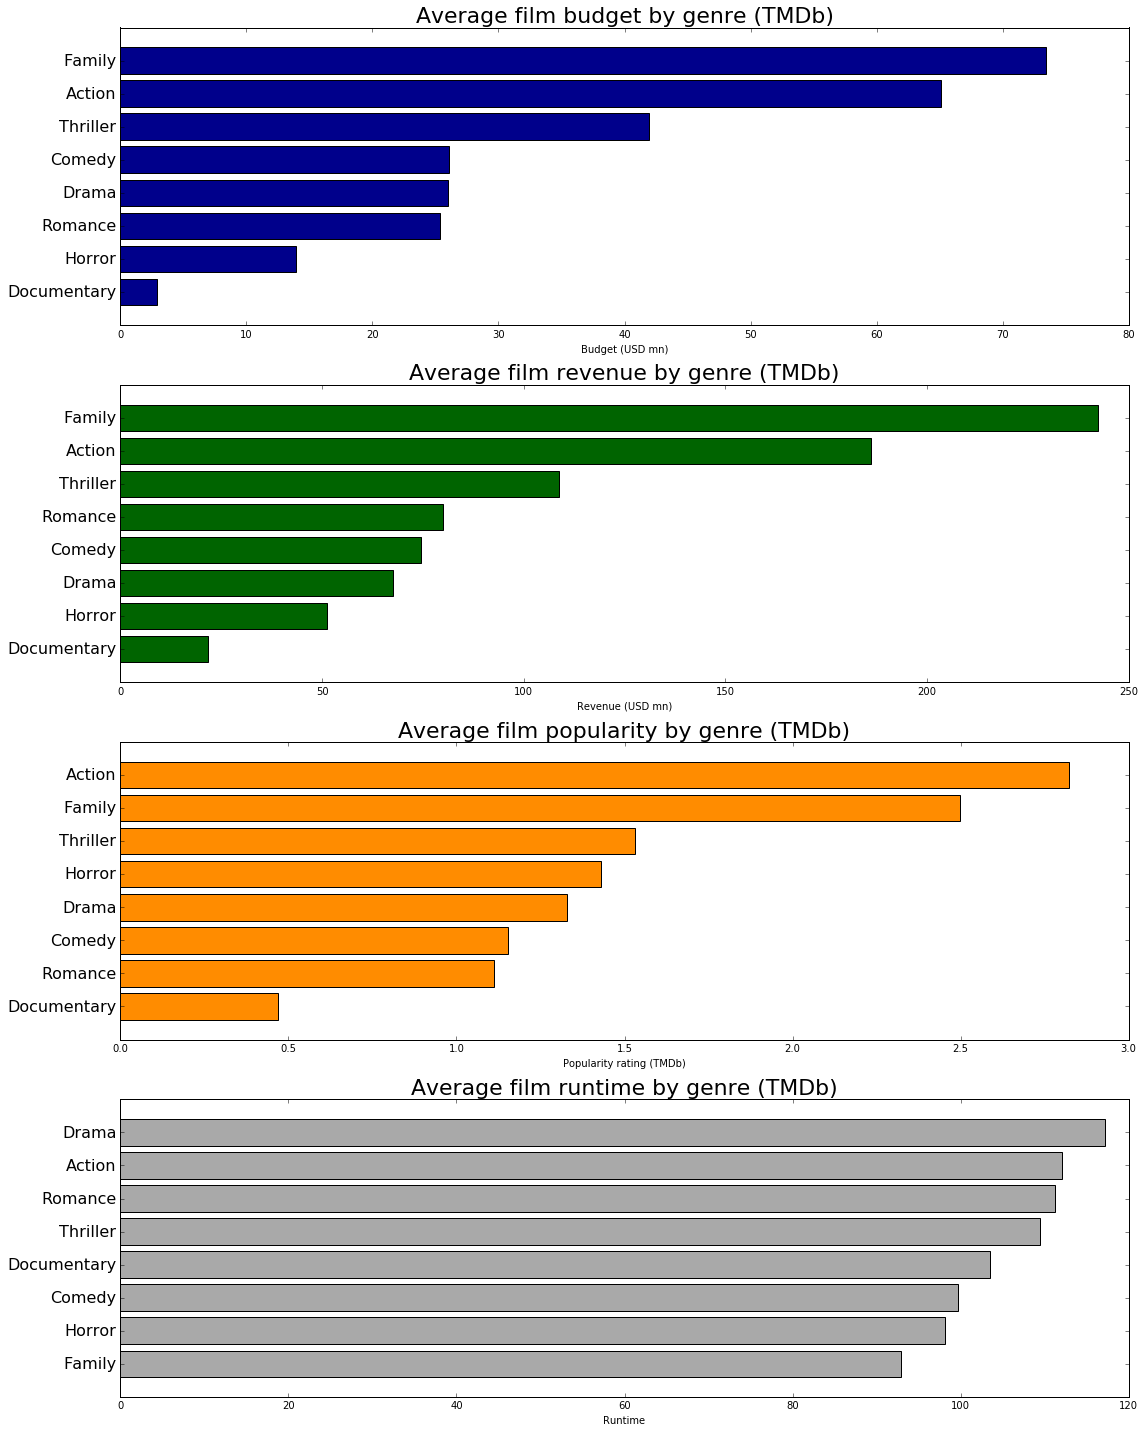

In [21]:
fig, ax = plt.subplots(4, 1, figsize = (16, 20))

y_pos = np.arange(len(genre_plot.index))

ax[0].barh(y_pos, genre_plot['Average Budget'].sort_values()/1e6,  align = "center", color = "darkblue")
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(genre_plot.sort_values('Average Budget').index, fontsize = 16)
ax[0].set_ylim(-1, len(genre_plot.index))
ax[0].set_title("Average film budget by genre (TMDb)", fontsize = 22)
ax[0].set_xlabel("Budget (USD mn)")

ax[1].barh(y_pos, genre_plot['Average Revenue'].sort_values()/1e6, align = "center", color = "darkgreen")
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(genre_plot.sort_values('Average Revenue').index, fontsize = 16)
ax[1].set_ylim(-1, len(genre_plot.index))
ax[1].set_title("Average film revenue by genre (TMDb)", fontsize = 22)
ax[1].set_xlabel("Revenue (USD mn)")

ax[2].barh(y_pos, genre_plot['Average Popularity'].sort_values(), align = "center", color = "darkorange")
ax[2].set_yticks(y_pos)
ax[2].set_yticklabels(genre_plot.sort_values('Average Popularity').index, fontsize = 16)
ax[2].set_ylim(-1, len(genre_plot.index))
ax[2].set_title("Average film popularity by genre (TMDb)", fontsize = 22)
ax[2].set_xlabel("Popularity rating (TMDb)")

ax[3].barh(y_pos, genre_plot['Average Runtime'].sort_values(), align = "center", color = "darkgrey")
ax[3].set_yticks(y_pos)
ax[3].set_yticklabels(genre_plot.sort_values('Average Runtime').index, fontsize = 16)
ax[3].set_ylim(-1, len(genre_plot.index))
ax[3].set_title("Average film runtime by genre (TMDb)", fontsize = 22)
ax[3].set_xlabel("Runtime")

plt.tight_layout()
plt.show();

The main conclusion we drew from this section is that we would have to streamline and simplify the movie genre categories when assembling the training data. While the overlap could be informative, it could also be an obstacle in our ultimate goal of predicting one genre for each movie.

## Methodology  

The main methodological challenges at this point in the project were 1) how to structure our response variable and 2) what predictors to include. 

### Structuring the response variable  

The issue of response variable posed a number of unique challenges. In the first place, this was not a binary problem - we needed to predict movie genre across many categories. Further complicating this challenge, the two databases we used had different genre labels and both allowed multiple genres to be assigned to each film.  

We first approached this problem by matching the exact phrasing of the genre name and stripping out genres that were not included on both databases. Then we explored a number of ways of simplifying and streamlining the response variable. Our first approach was to create joint genre categories. So if "Romance" and "Comedy" were listed together above a certain frequency threshold, we created a genre called "Romance-Comedy." We then would keep only one label per film including the hyphenated labels. This approach defaulted to the genre that was most prevelant in the data. After experimenting with this approach, we decided to simplify this further by eliminating the hyphenated genres. Now, each film would be categorized by the genre that was most prevalent among the overall film data. 

Finally, the genre labels for our data were not balanced. To correct for this, we chose to undersample the more prevalent categories.

### Choosing predictors  

